<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

*Imporant note to the reviewer*
My sincerest apologies for the late submission of my project.  I was sick for almost two weeks back to back and I was having health issues and multiple doctor appointments for a short moment.  Also, I live in Los Angeles, CA and we are currently experiencing a flash flood warning.  Sorry for the inconvenience.

Project Title:  Sprint 3 Statistical Data Analysis (SDA) Project

Project Summary:  Use the data from the megaline company surf and ultimate plans in order to: clean and analyze data, create
charts such as bar plots, boxplots and histograms, and to perform t-tests to determine the validity of null and alternative hypotheses about the data.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

In [1]:
#Import the neccesary libraries.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from scipy import stats as st

## Load data

In [2]:
#Use a try and except clause in order to load/read the dataframes on a local and non-local computer.
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
except:
    calls = pd.read_csv('megaline_calls (2).csv')

try:
    internet = pd.read_csv('/datasets/megaline_internet.csv')
except:
    internet = pd.read_csv('megaline_internet (1).csv')

try:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
except:
    messages = pd.read_csv('megaline_messages.csv')
    
try:
    plans = pd.read_csv('/datasets/megaline_plans.csv')
except:
    plans =pd.read_csv('megaline_plans (1).csv')

try:
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    users = pd.read_csv('megaline_users (1).csv')

## Step 2. Prepare the data 

#### Step 2 Project Instructions:
Step 2. Prepare the data

    Convert the data to the necessary types
    Find and eliminate errors in the data

Explain what errors you found and how you removed them. 

For each user, find:

    The number of calls made and minutes used per month
    The number of text messages sent per month
    The volume of data per month
    The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

#### calls Dataframe Data Cleaning / Preprocessing

In [3]:
#Use the head() method to print the first five rows of the dataframe.
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Code Result:  All the entries in the calls dataframe seems to be ok, but the duration column needs to have their
values rounded.

In [4]:
#Use np.ceil in order to round the values in the duration column.
calls['duration'] = np.ceil(calls['duration'])

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for using the `ceil()` method

In [5]:
#Use the info() method in order to check the datatypes in the calls dataframe. 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Code Result:
The 'call_date' column of the calls dataframe needs to be converted from object data type to datetime data type.

In [6]:
#Use the to date_time() method on the call_date column of the calls dataframe
#in order to convert the dates from object type to datetime type.  
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [7]:
#Use the info() method in order to double check the data types in the calls dataframe.
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Code Result:  All the data types look correct.  The call_date column was converted from
object type to to datetime64[ns] type successfully.

In [8]:
#Use the isna() and sum() methods in order to check for missing values in the calls dataframe.
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Code Result:
There are no missing values noted on the calls dataframe.

In [9]:
#Use conditional filtering and the duplicated() method in order to print any duplicate
#rows found in the calls dataframe.
calls[calls.duplicated()]

,id,user_id,call_date,duration


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

Code Result:  
There are no duplicate values noted in the call dataframe.

#### internet Dataframe Data Cleaning/ Preprocessing

In [10]:
#Use the head() method on the internet dataframe in order to print the first five rows of the
#dataframe and check the column entries.
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Code Result:  
All the data in the internet dataframe seems to be  correct, but the mb_used column needs to have its values rounded.

In [11]:
#Use numpy's np.ceil() method on the md_used column of the internet dataframe in order to
#round the results for the column
internet['mb_used'] = np.ceil(internet['mb_used'])

In [12]:
#Use the info() method in order to check the data types in the internet dataframe.
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Code Result:
The session_date column of the internet dataframe needs to be converted from object data type to datetime data type.
All the other columns in the dataframe have the correct data type.

In [13]:
#Use pd.to_datetime() method in order to convert the session_date column in the internet
#dataframe from object type to datetime type.  
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [14]:
#Use the info() method in order to double check the data types in the internet dataframe.
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Code Result:  
The data types of the columns in the internet dataframe are correct.  The session_date column was changed to the 
datetime64[ns] type successfully.

In [15]:
#Use the isna() and sum() methods in order to check for missing values in the internet dataframe.
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Code Result:
There are no missing values noted in the internet dataframe.

In [16]:
#Use conditional filtering and the duplicated() method in order to print out any
#duplicate rows present in the internet dataframe.
internet[internet.duplicated()]

,id,user_id,session_date,mb_used


Code Result:
There are no duplicate rows noted on the internet dataframe.

#### messages Dataframe Data Cleaning/ Preprocessing

In [17]:
#Use the head() method on the messages dataframe in order to check the first five rows of the 
#messages dataframe.
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Code Result:  The columns in the dataframe seem to be listed correctly.  No editing is necessary for the content.

In [18]:
#Use the info() method in order to check the data types in the messages dataframe.
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Code Result:
The message_date column of the messages dataframe needs to be converted from object to datetime data type.

In [19]:
#Use pd.todatetime() in order to change the message_date column in the messages dataframe from
#object type to datetime64[ns] type.
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
#Use the info() method on the messages dataframe to double check if the data types are correct.
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Code Result:
The data types in the messages dataframe appear to be correct.  The message_date column
appears to have been converted to datetime64[ns] type successfully. 

In [21]:
#Use the isna() and sum() methods in order to check for missing values in the messages dataframe.
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

Code Result:
There are no missing values noted in the messages dataframe.

In [22]:
#Use conditional filtering and the duplicated() method in order to print out any
#duplicate rows present in the messages dataframe.
messages[messages.duplicated()]

,id,user_id,message_date


Code Result:
There are no duplicate values noted in the messages dataframe.

#### plans Dataframe Data Cleaning/ Preprocessing

In [23]:
#Print the plans dataframe.
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Code Result:  The dataframe content in the rows of the plans seems to be listed correctly.  No need to alter the data.

In [24]:
#Use the isna() and sum() methods in order to check for missing values in the
#plans dataframe.
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Code Result:  There are no missing values noted in the plans dataframe.

In [25]:
#Use the conditional filtering and the duplicated() method in order to print
#any duplicate rows present in the plans dataframe.
plans[plans.duplicated()]

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name


Code Result:
There are no duplicate values noted in the plans dataframe.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

In [26]:
#Use the info() method on the plans dataframe to check the data types.
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


Code Result:
The data types in the plans dataframe appears to be correct.

#### users Dataframe Data Cleaning/ Preprocessing

In [27]:
#Use the head() function on the users dataframe in order to display the first five rows of the users dataframe.
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Code Result:  
It seems there are multiple missing values in the churn_date column.  The rest of the columns appear to have
their data correctly listed.

In [28]:
#Use the isna() and sum() methods in order to check the users dataframe for missing values.
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Code Result:
There are 466 missing values noted in the churn_date column of the users dataframe.

In [29]:
#Use dropna() method on the users dataframe in order to drop the missing values from the users dataframe. 
#Set the axis on the dropna() method to columns.
users = users.dropna(axis='columns')

#Use head() method on the users dataframe once again to display the first five rows of data.
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf


Code Result:
It seems that the missing values from the churn_date dataframe have been dropped/ deleted.

In [30]:
#Use the isna() and sum() methods once again to double check the users dataframe
#for missing values.
users.isna().sum() 

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
dtype: int64

Code Result:
There are no longer any missing values noted in the users dataframe.  The missing values in the churn_date
column have been successfully dropped.

In [31]:
#Use conditional filtering and the duplicated() method in order to print out any duplicate rows 
#present in the users dataframe.
users[users.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan


Code Result:
There are no duplicate values noted in the users dataframe.

In [32]:
#Use the info() method in order to check the data types in the users dataframe.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


Code Result:
The reg_date column of the users dataframe needs to be converted from object to datetime64 data type.  The 
other columns in the users dataframe appear to have the correct datatype.

In [33]:
#Use the pd.to_datetime() method on the reg_date column of the users dataframe in order to convert 
#the column from the object data type to the datetime64[ns] data type.
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [34]:
#Use the info() method on the users dataframe to verify if the data types are correct.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


Code Result:
The reg_date column in the users dataframe appears to have been changed to the datetime64[ns] datatype correctly.  
All the other columns appear to have the correct data type.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct

### Double Checking Data For Any Errors To Be Fixed

#### Plans

In [35]:
# Print the general/summary information about the plans DataFrame

#Use the info() method on the plans dataframe to check the data types.
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


Code Result:
The data types in the plans dataframe appears to be correct.

In [36]:
#Use the isna() and sum() methods in order to check for missing values in the plans
#dataframe.
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Code Result:  
There are no missing values noted in the plans dataframe.

In [37]:
#Use conditional filtering and the duplicated() method in order to print any duplicate rows
#present in the plans dataframe.
plans[plans.duplicated()]

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name


Code Result:
There are no duplicate values noted in the plans dataframe.

In [38]:
# Print a sample of data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Code Result:
The data in the rows in the plans dataframe appears to be listed correctly.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

#### Fix data (plans dataframe)

[Fix obvious issues with the data given the initial observations.]

There are no noted reasons to fix any issues in the plans dataframe.  All the issues in the dataframe
were fixed in the previous data cleaning/ preprocessing step.

#### Enrich data (plans dataframe)

[Add additional factors to the data if you believe they might be useful.]

There are no noted reasons to enrich data in the plans dataframe.

#### Users

In [39]:
# Print the general/summary information about the users' DataFrame

#Use the info() method on the users dataframe to verify if the data types are correct.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


Code Result:
The data types in the users dataframe appear to be correct.

In [40]:
#Use the isna() and sum() methods in order to check for any missing values in the users
#dataframe.
users.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
dtype: int64

Code Result:
There are no missing values noted in the users dataframe.

In [41]:
#Use conditional filtering and the duplicated() method in order to print any duplicate rows
#present in the users dataframe.
users[users.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan


Code Result:
There are no duplicate rows noted in the users dataframe.

In [42]:
# Print a sample of data for users

#Use the head() method on the users dataframe to print out the first 5 rows.
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

#### Fix Data (users dataframe)

[Fix obvious issues with the data given the initial observations.]

There are no noted errors to be fixed in the users dataframe.  All errors present in the users dataframe
were fixed in the previous data cleaning/preprocessing step.

#### Enrich Data (users dataframe)

[Add additional factors to the data if you believe they might be useful.]

There are no noted reasons to  the enrich data in the users dataframe.

#### Calls

In [43]:
# Print the general/summary information about the calls' DataFrame.

#Use the info() on the calls dataframe in order to check the data types.
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Code Result:  All the data types in the calls dataframe look correct.

In [44]:
#Use the isna() and sum() methods in order to check for missing values in the 
#calls dataframe.
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Code Result:
There are no missing values noted on the calls dataframe.

In [45]:
#Use conditional filtering and the duplicated() method in order to print any duplicate
#rows present in the calls dataframe.
calls[calls.duplicated()]

,id,user_id,call_date,duration


Code Result:  
There are no duplicate rows noted in the call dataframe.

In [46]:
# Print a sample of data for calls

#Use the head() method to print out the first five rows of the calls dataframe.
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


Code Result:
The information in the rows of the calls dataframe appears to be listed correctly.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Well done

#### Fix data (calls dataframe)

[Fix obvious issues with the data given the initial observations.]

There is no need noted reason to fix any issues in the calls dataframe.  All issues present in the calls
dataframe were fixed in the previous data cleaning/ preprocessing step.

#### Enrich data (messages dataframe)

[Add additional factors to the data if you believe they might be useful.]

There are no noted reasons to enrich any data in the calls dataframe.

## Messages

In [47]:
# Print the general/summary information about the messages' DataFrame

#Use the info() method on the messages dataframe to check if the data types are correct.
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Code Result:
The data types in the messages dataframe appear to be correct.

In [48]:
#Use the isna() and sum() methods in order to check the messages dataframe for missing values.
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

Code Result:
There are no missing values noted in the messages dataframe.

In [49]:
messages[messages.duplicated()]

,id,user_id,message_date


Code Result:
There are no duplicate values noted in the messages dataframe.

In [50]:
# Print a sample of data for messages

#Use the head() method in order to print the first five rows of the messages dataframe.
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Code Result:
The data in the rows of the messages dataframe appear to be listed correctly.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

#### Fix data (messages dataframe)

[Fix obvious issues with the data given the initial observations.]

There is no noted reason to fix any issues in the messages dataframe.  All the issues in the message dataframe 
were fixed in the previous data cleaning/ preprocessing step.

#### Enrich data (messages dataframe)

[Add additional factors to the data if you believe they might be useful.]

There is no noted reason to enrich any data in the messages dataframe.

#### Internet 

In [51]:
# Print the general/summary information about the internet DataFrame.

#Use the info() method to check the data types in the internet dataframe.
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Code Result:  The data types in the internet dataframe look correct.  The session_date column was changed to the datetime64[ns]
type successfully in the previous data cleaning/ preprocessing step.

In [52]:
#Use the isna() and sum() methods in order to check the internet dataframe for missing values.
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Code Result:
There are no missing values noted in the  internet dataframe.

In [53]:
#Use conditional filtering and the duplicated() methods in order to print any
#duplicate rows present in the internet dataframe.
internet[internet.duplicated()]

,id,user_id,session_date,mb_used


Code Result:
There are no duplicate values noted on the internet dataframe.

In [54]:
# Print a sample of data for the internet traffic.

#Use the head() method in order to print the first five rows of the internet dataframe.
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,90.0
1,1000_204,1000,2018-12-31,0.0
2,1000_379,1000,2018-12-28,661.0
3,1000_413,1000,2018-12-26,271.0
4,1000_442,1000,2018-12-27,881.0


Code Result:
The information in the rows of the internet dataframe appear to be listed correctly.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

#### Fix data (internet dataframe)

[Fix obvious issues with the data given the initial observations.]

There is no noted reason to fix any issues in the internet dataframe.  The issues in the internet dataframe
were fixed in the previous data cleaning/ preprocessing step.

#### Enrich data (internet dataframe)

[Add additional factors to the data if you believe they might be useful.]

There is no noted reason to enrich any data in the internet dataframe.

#### Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

#### Print out the plan conditions and make sure they are clear for you

Plan Conditions:

Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7

#### Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

### Project Instructions:

For each user, find: The number of calls made and minutes used per month

In [55]:
#Create a month column in the calls dataframe by using the dt.month function on the calls_date column of the calls dataframe.
calls["month"] = calls["call_date"].dt.month 

#Group the calls dataframe by user and month using the groupby() function.  Then, calculate the 
#number of calls (count of 'duration' column) and the total call duration (sum of 'duration' column).
calls_month_total = calls.groupby(["user_id", "month"]).agg({"duration": ["count", "sum"]})

In [56]:
# Calculate the number of calls made by each user per month. Save the result.

#Create a pivot table using the pivot_table() method to summarize calls per user month.  Use the index= parameter
#to group the rows by 'user_id' and 'month'.  For each group, calculate: the number of calls (count of 'duration' column)
#and total duration of calls (sum of 'duration' column).
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count','sum'])

#Use the head() method to print the first five rows of calls_per_month.
calls_per_month.head()

count      sum
              duration duration
user_id month                  
1000    12          16    124.0
1001    8           27    182.0
        9           49    315.0
        10          65    393.0
        11          64    426.0

Code Result:
The calls_per_month pivot table was successfully created.

In [57]:
# Calculate the amount of minutes spent by each user per month. Save the result.

#Create a pivot table using the pivot_table() method.  Use the index= parameter in order group the rows by 'user_id' and
#'month'.  For each group, calculate: the number of calls (count of the 'duration column') and the total duration of calls
#(sum of the 'duration' column).  Use the reset_index() method in order to reset the index.
minutes_per_month = calls.pivot_table(index=['user_id', 'month'], 
                                      values='duration', 
                                      aggfunc=['count', 'sum']).reset_index(col_level=1)

#Use the .columns method in order to rename the columns approriately.
minutes_per_month.columns = ["user_id", "month", "count", "duration"]

#Use the head() method to print the first five rows of the pivot table.
minutes_per_month.head()

,user_id,month,count,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


Code Result:
The minutes_per_month pivot table was created successfully.

#### Project Instructions:

For each user find: the number of text messages sent per month.

In [58]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month'] = messages['message_date'].dt.month

#Create a pivot table using the pivot_table() method. Use the index= parameter to group the rows by 'user_id' and 'month'.
#Calculate the total number of messages (count and sum of 'message_date' column).  Use the reset_index() method in order
#to reset the index.
messages_per_month = messages.pivot_table(index=['user_id', 'month'], 
                                          values='message_date', 
                                          aggfunc=['count', 'sum']).reset_index(col_level=1)

#Use .columns in order to rename the columns appropriately.
messages_per_month.columns = ['user_id', 'month', 'messages_count']

#Use the head() method to print the first five rows of the pivot table.
messages_per_month.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_5992\2888333204.py:7: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  messages_per_month = messages.pivot_table(index=['user_id', 'month'],


,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


Code Result:
The messages_per_month pivot table was created successfully.

### Project Instructions:
For each user find: the volume of data per month.

In [59]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

#Use the dt.month method in order to order to create a month column using the 'session_date' column for the
#internet dataframe.
internet['month'] = internet['session_date'].dt.month

#Use the pivot_table() method to create a pivot table.  Use the index= parameter in order to group the rows
#by 'user_id' and 'month'.  Calulate the total number of megabytes per month (the sum of the 'mb_used') column.
#Use the reset_index() method in order to reset the index.
internet_traffic_per_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum']).reset_index()

#Use .columns method in order to rename the columns appropriately.
internet_traffic_per_month.columns = ['user_id', 'month', 'total_mb']

#Use the head() method in order to print the first five rows of the pivot table.
internet_traffic_per_month.head()

,user_id,month,total_mb
0,1000,12,1903.0
1,1001,8,6929.0
2,1001,9,13333.0
3,1001,10,22356.0
4,1001,11,18524.0


Code Result:
The pivot table was created successfully.

#### Creating The Merged Dataframe.

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [60]:
#Create a master dataframe called 'df_merge' by first merging the minutes_per_month pivot with the 
#messages_per_month pivot table by using merge() function.  Pass: on=['user_id','month'], how='outer'
#as arguements to the merge() function in order to merge on the user_id and month columns of the messages_per_month
#pivot table and perform an outer merge.
df_merge = minutes_per_month.merge(messages_per_month, on=['user_id','month'], how='outer')

#Merge the df_merge dataframe with the interent_traffic_per_month pivot table by using the merge() function.  Pass:
#on=['user_id', 'month'], how='outer' to the merge() function in order to merge on the user_id and month columns of the
#internet_traffic_per_month pivot table and perform an outer merge.
df_merge = df_merge.merge(internet_traffic_per_month, on=['user_id', 'month'], how='outer')

#Merge the df_merge dataframe with the 'user_id', 'city', and 'plan' columns on the users dataframe by using the merge() 
#function.  Pass:on=['user_id'], how='left' in order to perform a left merge on the user_id column of the users dataframe 
#and to perform a left merge. 
df_merge = df_merge.merge(users[['user_id', 'city', 'plan']], on=['user_id'], how='left')

#Use the head() method in order to print the first five rows of the dataframe.
df_merge.head()

,user_id,month,count,duration,messages_count,total_mb,city,plan
0,1000,12,16.0,124.0,11.0,1903.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27.0,182.0,30.0,6929.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49.0,315.0,44.0,13333.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,65.0,393.0,53.0,22356.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,64.0,426.0,36.0,18524.0,"Seattle-Tacoma-Bellevue, WA MSA",surf


Code Result:
The dataframe appears to be merged correctly, but total_mb column needs to be converted from megabytes to gigabytes and
there seems to be missing values in the dataframe.

In [61]:
#Convert the total_mb column to gigabytes and create a new column called 'total_gb'. Use
#np.ceil to round the column values.
df_merge['total_gb'] = np.ceil(df_merge['total_mb'] / 1024)

#Use the head() method in order print the first five rows of the df_merge dataframe.
df_merge.head()

,user_id,month,count,duration,messages_count,total_mb,city,plan,total_gb
0,1000,12,16.0,124.0,11.0,1903.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2.0
1,1001,8,27.0,182.0,30.0,6929.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,7.0
2,1001,9,49.0,315.0,44.0,13333.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,14.0
3,1001,10,65.0,393.0,53.0,22356.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,22.0
4,1001,11,64.0,426.0,36.0,18524.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,19.0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The gigabytes are rounded up at the end of each month

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Wii done

Code Result:
The df_merge['total_gb'] column was successfully created with the correct values.

In [62]:
#Use the isna() and sum() methods in order to check for missing values in the df_merge dataframe.
df_merge.isna().sum()

user_id             0
month               0
count              35
duration           35
messages_count    487
total_mb           16
city                0
plan                0
total_gb           16
dtype: int64

Code Result:
There appears to be missing values in the count, duration, messages_count, total_mb and the total_gb 
columns of the df_merge dataframe.

In [63]:
#Use the fillna() method on the the df_merge() dataframe in order to fill in missing values with the value '0'.
df_merge.fillna(0, inplace=True)

In [64]:
##Use the isna() and sum() methods in order to double check for missing values in the df_merge dataframe.
df_merge.isna().sum()

user_id           0
month             0
count             0
duration          0
messages_count    0
total_mb          0
city              0
plan              0
total_gb          0
dtype: int64

In [65]:
#Create the gb_per_month included column by converting the 'mb_per_month_included' column from megabytes to 
#gigabytes by dividing the values in the column by 1024.
plans['gb_per_month_included'] =  plans['mb_per_month_included'] / 1024

#Print the plans dataframe in order to check the column values.
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Code Result:
Megabytes were converted to gigabytes sucessfully.

#### Project Instructions:

For each user find: the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

In [66]:
#Use the def() method in order to create a function for calculating the revenue earn from each user for the ultimate and
#surf plans.
def plan_revenue(row):
    #Create an empty variable that will be used as a counter.
    revenue = 0
    
    #Use the row[] method in order to index the approriate rows.
    plan = row['plan']
    messages_count = row['messages_count']
    duration = row['duration']
    total_gb = row['total_gb']
    
    #Select the row from the 'plans' dataframe where 'plan_name' matches the given plan,
    #then use the iloc() method to extract the first and only matching row a Series containing
    #the plan's details.
    plan_details = plans[plans['plan_name'] == plan].iloc[0]
    
    #Calculate the charges for minutes_over, messages_over and data_over.  Use the max()
    #method in order to assign the value as 0 if a negative value is calculate, meaning no charges incurred.
    minutes_over = max(0, duration - plan_details['minutes_included'])
    messages_over = max(0, messages_count - plan_details['messages_included'])
    data_over = max(0, total_gb - plan_details['gb_per_month_included'])
    
    #Calculate the charges for: extra minutes, extra messages and extra data charge.
    extra_minute_charge = minutes_over * plan_details['usd_per_minute']
    extra_message_charge = messages_over * plan_details['usd_per_message']
    extra_data_charge = data_over * plan_details['usd_per_gb']
    
    #Calculate the total revenue.
    revenue = plan_details['usd_monthly_pay'] + extra_minute_charge + extra_message_charge + extra_data_charge
    
    #Return the total revenue.
    return revenue

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great!

 Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). 
    N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [67]:
#Use the apply() method in order to create the revenue column using the previously created plan_revenue() function.
df_merge['revenue'] = df_merge.apply(plan_revenue, axis=1)

#Use the head() method in order to print the first five rows of the df_merge dataframe.
df_merge.head()

,user_id,month,count,duration,messages_count,total_mb,city,plan,total_gb,revenue
0,1000,12,16.0,124.0,11.0,1903.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2.0,70.00
1,1001,8,27.0,182.0,30.0,6929.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,7.0,20.00
2,1001,9,49.0,315.0,44.0,13333.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,14.0,20.00
3,1001,10,65.0,393.0,53.0,22356.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,22.0,90.09
4,1001,11,64.0,426.0,36.0,18524.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,19.0,60.00


Code Result:  The revenue column was successfully created in the df_merged dataframe.

## Step 3.  Study user behaviour

### Step 3. Project Instructions:
Step 3. Analyze the data

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions. 

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls dataframe barplot.

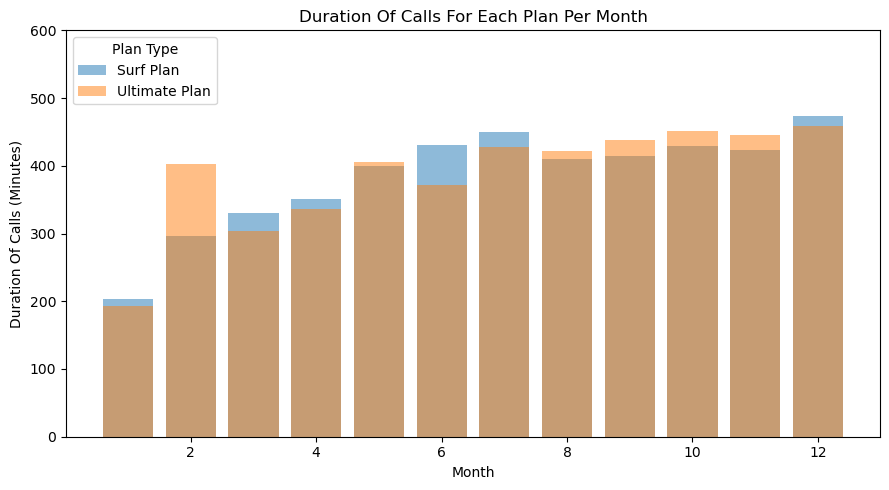

In [68]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

#Use the groupby() method to group the rows by 'plan' and 'month'.  Use the mean() method in order to calculate the
#mean for the call durations for each user per month for each plan.  Use the rest_index() method in order to reset the 
#index.
calls_per_month = df_merge.groupby(['plan', 'month'])['duration'].mean().reset_index()

#Use conditional filtering in order to creat a dataframe for Surf Plan user info and Ultimate Plan user info.
surf_plan_info = calls_per_month[calls_per_month['plan'] == 'surf']
ultimate_plan_info = calls_per_month[calls_per_month['plan'] == 'ultimate']

#Use matplotlib in order to create a dataframe for Duration of Calls for Each Plan Per Month.
plt.figure(figsize=(9, 5))
plt.bar(x='month', height='duration',data=surf_plan_info, alpha=0.5, label="Surf Plan")

plt.bar(x='month', height='duration', data=ultimate_plan_info, alpha=0.5, label="Ultimate Plan")

plt.title('Duration Of Calls For Each Plan Per Month')
plt.xlabel("Month")
plt.ylabel("Duration Of Calls (Minutes)")
plt.legend(title="Plan Type", loc="upper left")
plt.ylim(0, 600)
plt.tight_layout()
plt.show()

Chart Conclusion:
It appears that Surf Plan users have longer call durations that Ultimate Plan users per month during the months of:
January, March, April, June, July, and December.

It appears that Ultimate Plan users have longer call durations that Surf Plan users per month during the months of:
February, May, August, September, October and November.

In [69]:
#Compare the number of minutes users of each plan require each month. Plot a histogram.

#Use the pivot_table() method in order to create a pivot table.  Use the index= parameter in order to 
#group the rows by 'month' and 'plan'.  Calculate the total duration of calls using the sum in the aggfunc= 
#hyperparameter.
minutes_per_month = df_merge.pivot_table(index=['month', 'plan'], values='duration', aggfunc='sum')

#Use the head() method to print the first five rows of the pivot table.
minutes_per_month.head()

duration
month plan              
1     surf         406.0
      ultimate     774.0
2     surf        2673.0
      ultimate    2822.0
3     surf        7590.0

#### Histogram Of Duration Count For Each User Plan

Text(0.5, 0, 'Duration Amount')

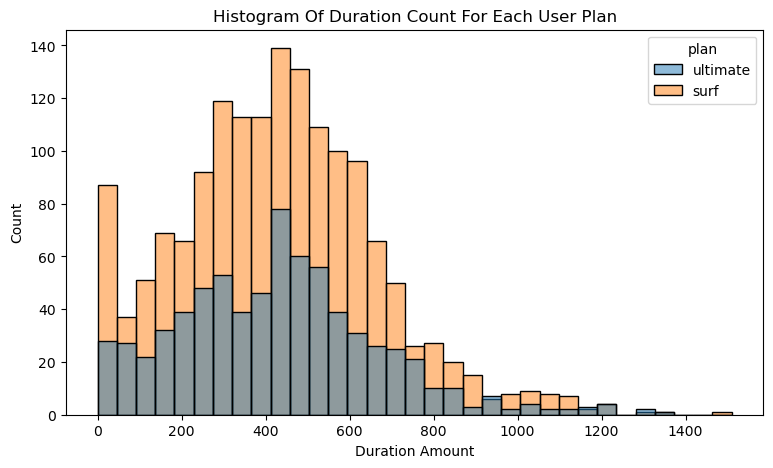

In [70]:
#Use sns.histplot() and matplotlib in order to create a histogram that displays the count of call duration values
#for each plan.
plt.figure(figsize=(9, 5))
sns.histplot(df_merge, x='duration', hue='plan')

plt.title("Histogram Of Duration Count For Each User Plan") 

plt.xlabel("Duration Amount")

Code Result: 
It appears that the Surf Plan has greater total count of call durations than the Ultimate Plan.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization

### Plan Mean And Variance 

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [71]:
#Calculate the mean and the variance of the call duration to reason on whether users on the
#different plans have different behaviours for their calls

#Use conditional filtering in order to create a dataframe that only contains surf plan users.
df_merge_surf = df_merge[df_merge['plan'] == 'surf']

print(f"Surf Plan Duration Mean: {df_merge_surf['duration'].mean():.2f}")

Surf Plan Duration Mean: 428.75


Code Result:
The mean number for the call durations of surf plan users is: 428.75.

In [72]:
#Use conditional filtering in order to create a dataframe that only contains ultimate plan users.
df_merge_ultimate = df_merge[df_merge['plan'] == 'ultimate']

print(f"Ulitmate Plan Duration Mean: {df_merge_ultimate['duration'].mean():.2f}")

Ulitmate Plan Duration Mean: 430.45


Code Result:
The mean number for the call durations of ultimate plan users is: 430.45.

In [73]:
#Find the variance for the call durations of surf users by using np.var() on the duration column of 
#df_merge_surf
surf_duration_variance = np.var(df_merge_surf['duration'])

print(f"Surf Plan Duration Variannce: {surf_duration_variance:.2f}")

Surf Plan Duration Variannce: 54933.33


The variance for the call duration of surf users is: 54933.33.

In [74]:
#Find the variance for the call durations of utlimate users by using np.var() on the duration column of 
#df_merge_ultimate.
ultimate_duration_variance = np.var(df_merge_ultimate['duration'])

print(f"Ultimate Plan Duration Variannce: {ultimate_duration_variance:.2f}")

Ultimate Plan Duration Variannce: 57764.13


Code Result:
The variance for the call duration of ultimate users is: 57764.13.

Conclusion:
The mean for the duration of calls ultimate plan is greater than the mean for the surf plan.  The variance for the 
duration of calls for the ultimate plan is greater than the variance for the total duration of calls fort the surf plan.

#### Monthly Call Duration Values Boxplot

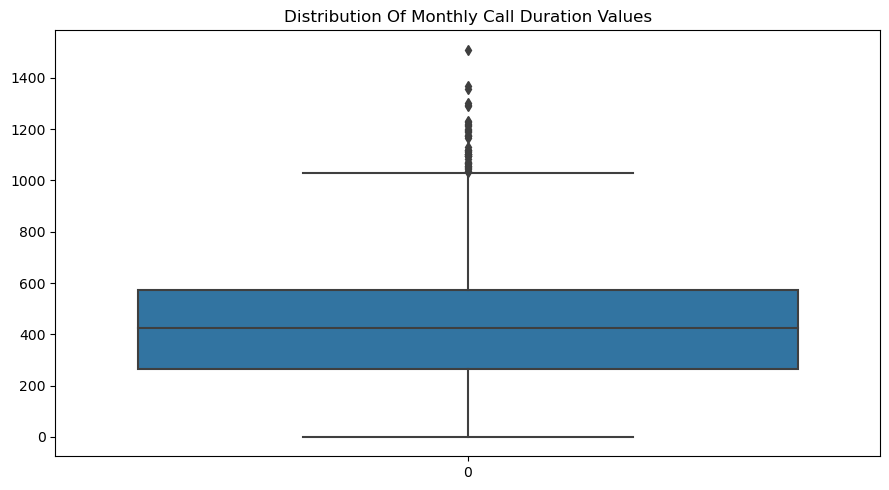

In [75]:
# Plot a boxplot to visualize the distribution of the monthly call duration.

#Use sns.boxplot() and matplotlib in order to create a boxplot that displays the 
plt.figure(figsize=(9,5))
sns.boxplot(df_merge['duration'])

plt.title('Distribution Of Monthly Call Duration Values')
plt.tight_layout()
plt.show()

Code Result:
It seems that 50th percentile(or median) of monthly call durations is: around 420.  The 25th percentile of month call durations
is: around 250.  The 75th percentile of monthly call durations is: around 580.  There also seems to be outliers in the data
in values over approximately 1020.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

#### Messages

In [76]:
# Compare the number of messages users of each plan tend to send each month

#Create a pivot table using the pivot_table() method. Group the dataframe by 'user_id' and 'month'.  Calculate
#the messages per month for each user by calculating the coutn and the sum of the message_date column.
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count', 'sum'])

#Use the head() method in order to print the first five rows of the dataframe.
messages_per_month.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_5992\2368519548.py:5: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count', 'sum'])


count
              message_date
user_id month             
1000    12              11
1001    8               30
        9               44
        10              53
        11              36

In [77]:
#Compare the amount of internet traffic consumed by users per plan

#Use the pivot_table() method in order to create a pivot table.  Group the dataframe by:
#'user_id', 'plan', and 'month'. Calculate the mean of the total_mb column for each
#entry. Use the rest_index() column to reset the index.
internet_traffic_per_month = df_merge.pivot_table(index=['user_id', 'plan', 'month'], 
                                                  values='total_mb', 
                                                  aggfunc=['mean']).reset_index()

#Use the .column function to rename the columns appropriate.
internet_traffic_per_month.columns = ['user_id', 'plan', 'month', 'avg_total_mb_used']

#Use the head() method in order to print the first five lines of the dataframe.
internet_traffic_per_month.head()

,user_id,plan,month,avg_total_mb_used
0,1000,ultimate,12,1903.0
1,1001,surf,8,6929.0
2,1001,surf,9,13333.0
3,1001,surf,10,22356.0
4,1001,surf,11,18524.0


Code Result:
The internet_traffic_per_month pivot table was created sucessfully.

#### Internet Traffic Distribution For Ultimate And Surf Plans Histogram

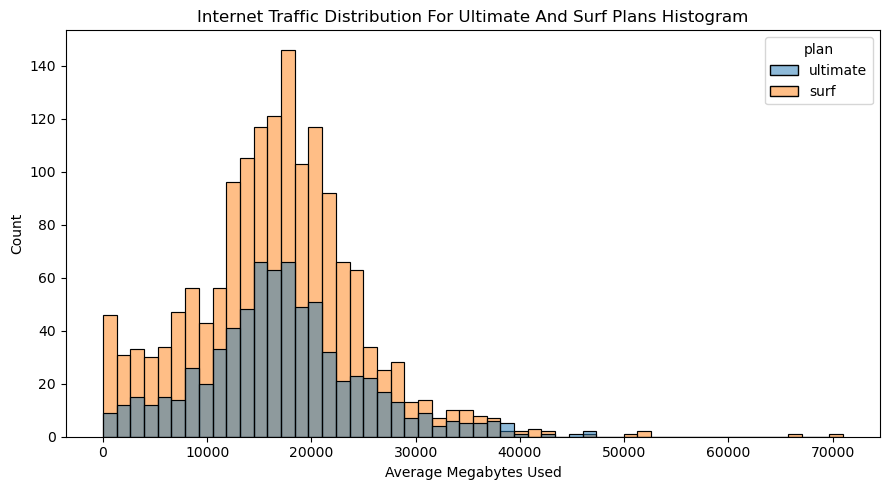

In [78]:
#Use matplotlib and seaborn in order to create a histogram that displays the internet traffic for both company plans.
plt.figure(figsize=(9, 5))
sns.histplot(internet_traffic_per_month, x='avg_total_mb_used', hue='plan')

plt.title('Internet Traffic Distribution For Ultimate And Surf Plans Histogram')
plt.xlabel('Average Megabytes Used')
plt.tight_layout()
plt.show()

Code Result:
It seems that there is a normal distribution for both the ultimate and surf plan users.  It also seems that there are more
mb being used for the surf plan than the ultimate plan. 

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

Conclusion:  There seems to be more internet traffic going on with the ultimate plan in comparison to the surf plan.
Both plans seem to be right skewed which indicates a positive skew.  There seems to be a normal distribution for both the
ultimate and surf plans.  The greatest frequency of the avg_total_mb_used (mean values of total_mb_used per month) of the ultimate plan is around 18,000 at approximately 150.  The greatest frequency of the avg_total_mb_used (mean values of total_mb_used_per_month) of the surf plan is both 16,000 and 18,000 at a count of approximately 65.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

### Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

#### Revenue Distribution For Ultimate And Surf Plans Histogram

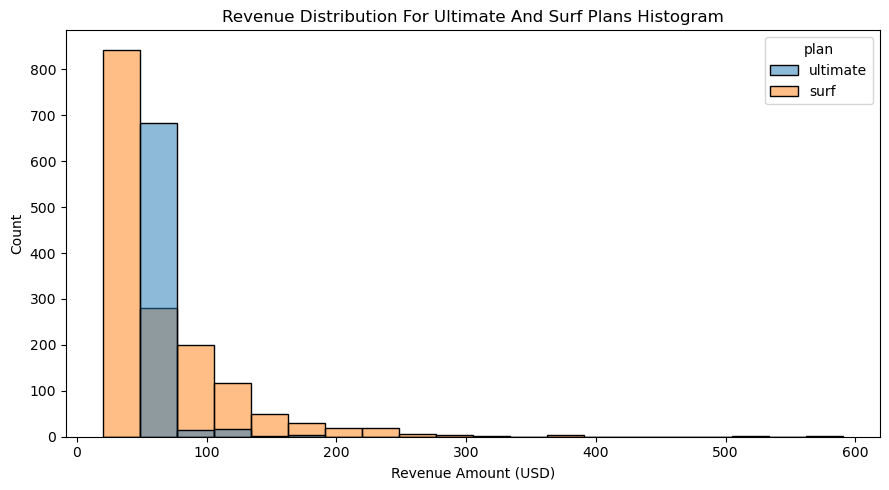

In [79]:
plt.figure(figsize=(9, 5))
sns.histplot(df_merge, x='revenue', hue='plan', bins=20)
plt.title('Revenue Distribution For Ultimate And Surf Plans Histogram')
plt.xlabel('Revenue Amount (USD)')
plt.tight_layout()
plt.show()

#### Monthly Revenue For Surf Plan Bar Chart

In [80]:
#In order to get rid of stacked_values use the groupby() method in order to sort the dataframe by 
#the 'month' column and use the sum() method in order to calcualte the sum of the 'revenue' column
#for each month.  Use the reset_index() method in order to reset the index.
surf_monthly_revenue = df_merge_surf.groupby('month')['revenue'].sum().reset_index()

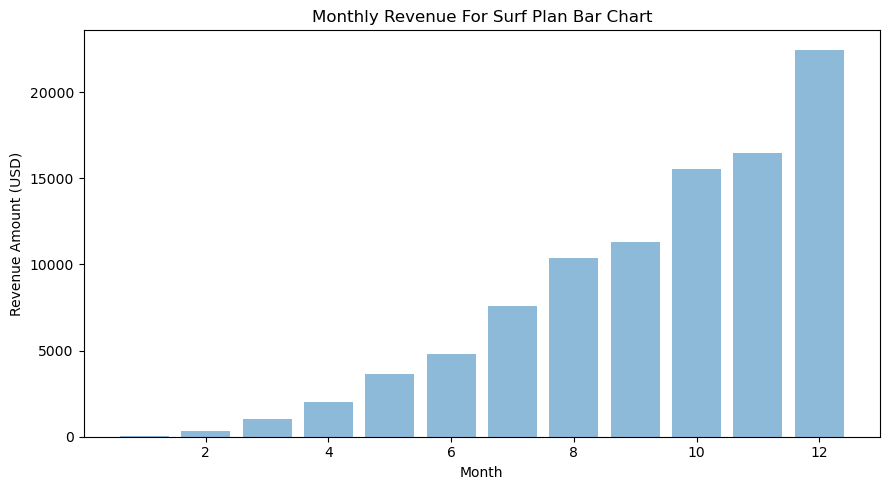

In [81]:
#Use seaborn and matplotlib in order to create a bar chart that displays the monthly revenue
#for the Surf plan for each month.
plt.figure(figsize=(9,5))
plt.bar(x='month', height='revenue', data=surf_monthly_revenue, alpha=0.5)
plt.title('Monthly Revenue For Surf Plan Bar Chart')
plt.xlabel('Month')
plt.ylabel('Revenue Amount (USD)')
plt.tight_layout()
plt.show()

In [82]:
#In order to get rid of stacked_values use the groupby() method in order to sort the dataframe by 
#the 'month' column and use the sum() method in order to calcualte the sum of the 'revenue' column
#for each month.  Use the reset_index() method in order to reset the index.
ultimate_monthly_revenue = df_merge_ultimate.groupby('month')['revenue'].sum().reset_index()

#### Monthly Revenue For Ultimate Plan Bar Chart

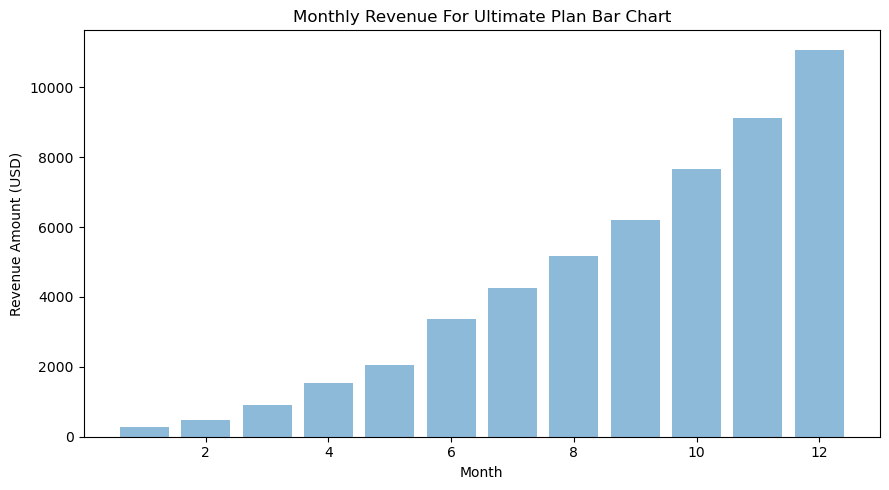

In [83]:
#Use seaborn and matplotlib in order to create a bar chart that displays the monthly revenue
#for the Ultimate plan for each month.
plt.figure(figsize=(9,5))
plt.bar(x='month', height='revenue', data=ultimate_monthly_revenue, alpha=0.5)
plt.title('Monthly Revenue For Ultimate Plan Bar Chart')
plt.xlabel('Month')
plt.ylabel('Revenue Amount (USD)')
plt.tight_layout()
plt.show()

Conclusion:  According to the histogram and the bar charts, it appears that the surf plan generates more monthly and total revenue than the ultimate plan.

[Formulate conclusions about how the revenue differs between the plans.]

### Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null Hypothesis:  Average revenue collected from users of Surf and Ultimate are equal.

Alternative Hypothesis:  Average revenue collected from users of Surf and Ultimate are not equal.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the null and alternative hypothesis

In [84]:
# Test the hypotheses

#Use conditional filtering in order to create a dataframe that only consists of users with the 
#Surf plan.
df_merge_surf = df_merge[df_merge['plan'] == 'surf']

#Use conditional filtering in order to create a dataframe that only consists of users with the 
#Ultimate plan.
df_merge_ultimate = df_merge[df_merge['plan'] == 'ultimate']

In [85]:
#Use the mean() method in order to calcualte the mean of the revenue column for the 
#Surf plan users.
surf_revenue_mean = df_merge_surf['revenue'].mean()

#Use the mean() method in order to calcualte the mean of the revenue column for the 
#Ultimate plan users.
ultimate_revenue_mean = df_merge_ultimate['revenue'].mean()

In [86]:
#Using an f-string print the mean for the revenue column for Surf Plan users.
print(f"Surf Plan Revenue Mean: {surf_revenue_mean:.2f}")

Surf Plan Revenue Mean: 60.80


In [87]:
#Using an f-string print the variance for the revenue column for Surf Plan users.
#Use np.var() in order to calculate the variance for the revenue column.
print(f"Surf Plan Revenue Variance: {np.var(df_merge_surf['revenue']):.2f}")

Surf Plan Revenue Variance: 3072.78


In [88]:
#Using an f-string print the mean for the revenue column for Ultimate Plan users.
print(f"Ultimate PLan Revenue Mean: {ultimate_revenue_mean:.2f}")

Ultimate PLan Revenue Mean: 72.33


In [89]:
#Using an f-string print the variance for the revenue column for Ultimate Plan users.
#Use np.var() in order to calculate the variance for the revenue column.
print(f"Ultiamte Plan Revenue Variance: {np.var(df_merge_ultimate['revenue']):.2f}")

Ultiamte Plan Revenue Variance: 132.03


Conclusion About the Calculated Mean and Variance:
It appears that the Ultimate plan revenue mean is greater than the surf plan revenue mean.  It also appears that the
Surf plan variance is greater than the ultimate plan variance.  So far, both of these calculations disprove my null hypothesis
that the meanboth the surf and ultimate plans are equal.  I also know now that because the variances of the both the surf and the ultimate plans are equal, I must set the equal_var parameter to False.  I will perform  a t-test in the next cell in 
order to check whether I can reject the null hypothesis or not.

In [90]:
#Set the alpha to 0.05 (which indicates a 5% probability threshold.)
alpha = 0.05

#Run a t-test using st.ttest_ind() on the revenue columns of the surf and ultimate plans.  Set equal_var to False
#because the variances of the revenue columns of the Surf and Ultimate Plans are not equal.
results = st.ttest_ind(df_merge_surf['revenue'], df_merge_ultimate['revenue'], equal_var=False)

#Write an if statement that prints: "We reject null hypothesis.", 
#if the pvalue from the results(calculated by using results.pvalue) is less than alpha.
if results.pvalue < alpha:
     print("We reject null hypothesis.")
#Write an else statement that prints: "We cannot reject null hypothesis.", 
#if the pvalues from the previous ttest is not less than alpha.
else:
    print("We cannot reject null hypothesis.")

We reject null hypothesis.


Code Result/Conclusion:
It appears that the results from the ttest conclude that: "We reject the null hypothesis", thus stating the the mean of
the Surf plan is not equal to the mean of the ultimate plan.  This conclusion also approves the alternative hypothesis.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null Hypothesis:  The average revenue collected from users in NY-NJ area is equal to the average revenue collected from users of other regions.

Alternative Hypothesis:  The average revenue collected from users in the NY-NJ area is not equal to the average revenue collected from users of other regions.

In [91]:
# Test the hypotheses

#Use conditional filtering in order to create a dataframe that only displays users from the
#NY-NJ-PA MSA areas.
df_merge_ny_nj = df_merge[df_merge['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']

#Use conditional filtering in order to create a dataframe that displays all other users that are not from 
#the NY-NJ-PA MSA areas
df_merge_other_cities = df_merge[df_merge['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

In [92]:
#Use the mean() method in order to calculate the mean of the revenue colum  of the df_merge_ny_nj
#dataframe.
ny_nj_mean = df_merge_ny_nj['revenue'].mean()

print(f"New York-Newark-Jersey City, NY-NJ-PA MSA Users Revenue Mean:\n{ny_nj_mean:.2f}")

New York-Newark-Jersey City, NY-NJ-PA MSA Users Revenue Mean:
60.00


In [93]:
#Use np.var() in order to calculate the variance of the revenue column for the df_merge_ny_j dataframe.
print(f"New York-Newark-Jersey City, NY-NJ-PA MSA Users Revenue Variance:\n{np.var(df_merge_ny_nj['revenue']):.2f}")

New York-Newark-Jersey City, NY-NJ-PA MSA Users Revenue Variance:
1890.83


In [94]:
#Use the mean() method in order to calculate the mean of the revenue colum  of the df_merge_other_cities
#dataframe.
other_cities_mean = df_merge_other_cities['revenue'].mean()

print(f"Revenue Column Mean For Users From All Other Cities: {other_cities_mean:.2f}")

Revenue Column Mean For Users From All Other Cities: 65.29


In [95]:
#Use np.var() in order to calculate the variance of the revenue column for the df_merge_other_cities dataframe.
print(f"Revenue Column Variance For Users From All Other Cities: {np.var(df_merge_other_cities['revenue']):.2f}")

Revenue Column Variance For Users From All Other Cities: 2229.99


Conclusion About Calculated Mean and Variance:
According to the results of the previous calculations, it appears that the mean revenue collected from other cities that are in not in the NY-NJ area is greater than the mean revenue collected from the NY-NJ area, which disproves the null hypothesis that the mean revenue collected in the NY-NJ area is equal to the mean revenue collected in other cities.  Also, the variance for the revenue collected from other cities is greater than the variance collected from the NY-NJ area, which indicates that the
equal_var parameter should be set to False.

In [96]:
#Set the alpha to 0.05 in order to indicate a 5% probability threshold.
alpha = 0.05

#Use st.ttest_ind() in order to perform a ttest on the revenue columns of df_merge_ny_nj and df_merge_other_cities.  
#Set equal_var to False because the variances of the revnue columns of the two dataset are not equal.
results = st.ttest_ind(df_merge_ny_nj['revenue'], df_merge_other_cities['revenue'], equal_var=False)

#Write an if statement that states that the pvalue(using results.pvalue) is less than alpha, print:
#"We reject null hypothesis.".
if results.pvalue < alpha:
     print("We reject null hypothesis.")
#Write an else statement that indicates if the pvalue of results is not less than alpha, print:
#"We cannot reject null hypothesis".
else:
    print("We cannot reject null hypothesis.")

We reject null hypothesis.


Code Result:
The results indicite that: "We cannot reject null hypothesis".  Thus, disproving that null hypothesis that the mean revenue of
NY-NJ area is equal to the mean revenue of revenue collected from other cities.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

General Conclusion:
It appears that the surf plan is superior and more profitable plan than the ultimate plan because: the surf plan generates more revenue overall,  the surf plan has a greater duration of calls being made, and the surf plan has a greater number of calls being made per month.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You've done a great job. There are a few things that need to be fixed

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊